# Car Price Prediction with imputed missing values

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading CSV file
car_df = pd.read_csv("cars_price.csv")

In [3]:
# Creating Copy
car_orig = car_df.copy()

In [4]:
# Looking at structure of the dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
Unnamed: 0             40000 non-null int64
make                   40000 non-null object
model                  40000 non-null object
priceUSD               40000 non-null int64
year                   40000 non-null int64
condition              40000 non-null object
mileage(kilometers)    40000 non-null float64
fuel_type              40000 non-null object
volume(cm3)            39970 non-null float64
color                  40000 non-null object
transmission           40000 non-null object
drive_unit             38655 non-null object
segment                36245 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 4.0+ MB


<b> Clearly here, we can see that there is some NULL values in volume, drive_units and segment variables. </b>

In [5]:
car_df.columns

Index(['Unnamed: 0', 'make', 'model', 'priceUSD', 'year', 'condition',
       'mileage(kilometers)', 'fuel_type', 'volume(cm3)', 'color',
       'transmission', 'drive_unit', 'segment'],
      dtype='object')

#### Drop Unwanted column

In [6]:
car_df.drop(columns = ['Unnamed: 0'],inplace = True)

In [7]:
# Summarizing the dataset
pd.set_option('display.float_format',lambda x: '%.3f' % x) # converted to 3 decimal places of float value
car_df.describe()

priceUSD      year  mileage(kilometers)  volume(cm3)
count  40000.000 40000.000            40000.000    39970.000
mean    7430.384  2003.486           243433.200     2103.202
std     8338.242     8.115           316703.267      938.725
min       95.000  1938.000                0.000      500.000
25%     2350.000  1998.000           137000.000     1600.000
50%     5350.000  2004.000           228000.000     1995.000
75%     9850.000  2010.000           308761.000     2300.000
max   195000.000  2019.000          9999999.000    20000.000

In [8]:
# Removing Duplicate data
car_df.drop_duplicates(keep = 'first',inplace = True)

In [9]:
car_df.shape

(39951, 12)

<b> 49 Duplicates </b> are removed from the data.

### Data Cleaning

In [10]:
# Check number of missing values in each feature
car_df.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1344
segment                3752
dtype: int64

<li> Missing Values:
    <ol> volume(cm3) : 30 </ol>
    <ol> drive_unit : 1344 </ol>
    <ol> segment : 3752 </ol>
</li>

### Impute missing values

#### For Qualitative Variable: volume(cm3)

In [11]:
def impute_nan(df,variable,impute_value):
    df[variable+'_imputed'] = df[variable].fillna(impute_value)

In [12]:
# imputing nan value with median
impute_nan(car_df,'volume(cm3)',car_df['volume(cm3)'].median())

In [13]:
car_df['volume(cm3)'].median()

1995.0

In [14]:
car_df.head()

make    model  priceUSD  year     condition  mileage(kilometers)  \
0       honda   accord       565  1993  with mileage           960015.000   
1        ford   fusion      5550  2008  with mileage           172000.000   
2      nissan    teana      8300  2008  with mileage           223000.000   
3  volkswagen      fox      3300  2005  with mileage           140000.000   
4      nissan  primera      2450  2002   with damage           413000.000   

  fuel_type  volume(cm3)     color transmission         drive_unit segment  \
0    petrol     2000.000     black    mechanics  front-wheel drive       D   
1    diesel     1400.000    silver    mechanics  front-wheel drive       M   
2    petrol     2500.000    purple         auto  front-wheel drive       D   
3    petrol     1200.000      blue    mechanics  front-wheel drive       A   
4    diesel     2200.000  burgundy    mechanics  front-wheel drive       D   

   volume(cm3)_imputed  
0             2000.000  
1             1400.000  
2             2500.000  
3             1200.000  
4             2200.000

In [15]:
print('Standard Deviation with NAN values: ',car_df['volume(cm3)'].std())
print('Standard Deviation After imputing NAN value: ',car_df['volume(cm3)_imputed'].std())

Standard Deviation with NAN values:  938.9961316217295
Standard Deviation After imputing NAN value:  938.6481874410559


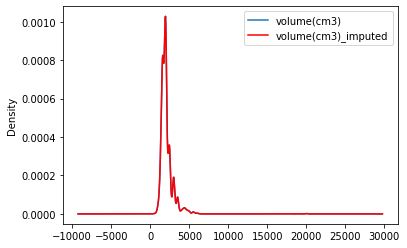

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
car_df['volume(cm3)'].plot(kind='kde', ax=ax)
car_df['volume(cm3)_imputed'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Note: There is very less distortion in the variable volume after imputing missing values. So, median will good for imputing missing values of volume.

#### For Qualititative Feature 

In [17]:
car_df.isnull().mean().sort_values(ascending=False)

segment               0.094
drive_unit            0.034
volume(cm3)           0.001
volume(cm3)_imputed   0.000
transmission          0.000
color                 0.000
fuel_type             0.000
mileage(kilometers)   0.000
condition             0.000
year                  0.000
priceUSD              0.000
model                 0.000
make                  0.000
dtype: float64

Note: Here we can see that categorical variables segment and drive_unit have missing values 9.4 % and 3.4 % repectively.

In [18]:
# Compute the frequency with each feature
car_df.groupby(['drive_unit'])['drive_unit'].count()

drive_unit
all-wheel drive                4173
front-wheel drive             27038
part-time four-wheel drive     2592
rear drive                     4804
Name: drive_unit, dtype: int64

Note: Frequent samples from front-wheel drive cars.

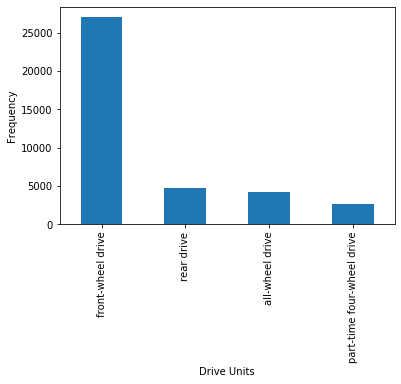

In [19]:
car_df['drive_unit'].value_counts().plot.bar()
plt.xlabel("Drive Units")
plt.ylabel("Frequency")
plt.show()

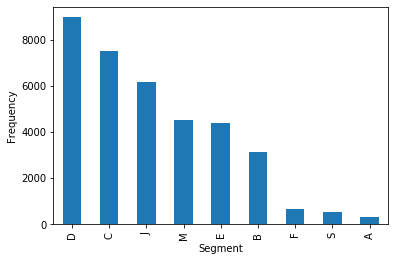

In [20]:
car_df['segment'].value_counts().plot.bar()
plt.xlabel("Segment")
plt.ylabel("Frequency")
plt.show()

##### Replace NaN with new category

In [21]:
def replace_nan(df,variable):
    df[variable+'_imputed'] = np.where(df[variable].isnull(),'Missing',df[variable])

In [22]:
for feature in ['segment','drive_unit']:
    replace_nan(car_df,feature)

In [23]:
car_df.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1344
segment                3752
volume(cm3)_imputed       0
segment_imputed           0
drive_unit_imputed        0
dtype: int64

In [24]:
car_df['car_age'] = 2020 - car_df['year']

In [25]:
final_df = car_df.drop(columns= ['make','model','year','volume(cm3)','drive_unit','segment'])
final_df.head()

priceUSD     condition  mileage(kilometers) fuel_type     color  \
0       565  with mileage           960015.000    petrol     black   
1      5550  with mileage           172000.000    diesel    silver   
2      8300  with mileage           223000.000    petrol    purple   
3      3300  with mileage           140000.000    petrol      blue   
4      2450   with damage           413000.000    diesel  burgundy   

  transmission  volume(cm3)_imputed segment_imputed drive_unit_imputed  \
0    mechanics             2000.000               D  front-wheel drive   
1    mechanics             1400.000               M  front-wheel drive   
2         auto             2500.000               D  front-wheel drive   
3    mechanics             1200.000               A  front-wheel drive   
4    mechanics             2200.000               D  front-wheel drive   

   car_age  
0       27  
1       12  
2       12  
3       15  
4       18

In [26]:
final_df.shape

(39951, 10)

#### variable price

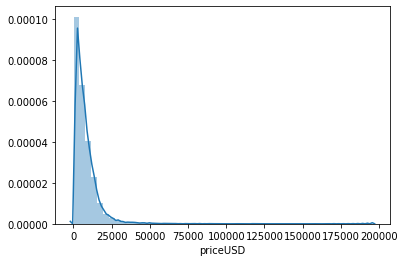

In [27]:
sns.distplot(final_df['priceUSD'])

In [28]:
final_df['priceUSD'].describe()

count    39951.000
mean      7431.945
std       8340.854
min         95.000
25%       2350.000
50%       5350.000
75%       9850.000
max     195000.000
Name: priceUSD, dtype: float64

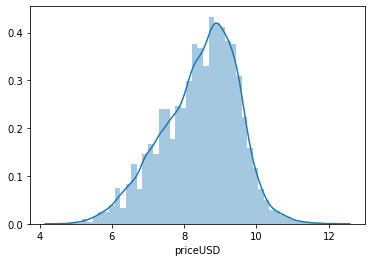

In [29]:
sns.distplot(np.log(final_df['priceUSD']))

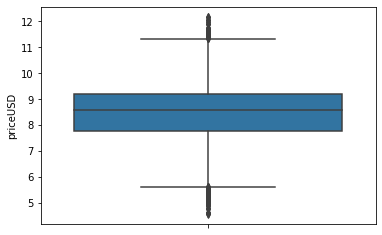

In [30]:
sns.boxplot(y=np.log(final_df['priceUSD']))

NOTE: log(priceUSD) is following normal distribution.

#### Variable year

In [31]:
yearwise_count = final_df['car_age'].value_counts().sort_index()
yearwise_count.head()

1     166
2     398
3     438
4     996
5    1439
Name: car_age, dtype: int64

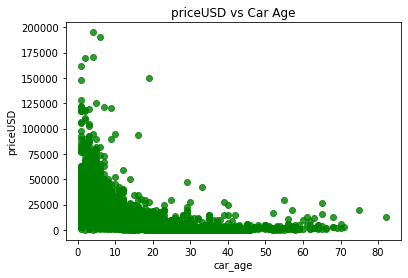

In [32]:
sns.regplot(x = 'car_age',y = 'priceUSD',scatter = True, fit_reg = False, data = final_df,color='green')
plt.title("priceUSD vs Car Age")
plt.show()

Here, We can clearly see that as the age of car increases, the car price decreases.

##### variable mileage

In [33]:
mileage_count = car_df['mileage(kilometers)'].value_counts().sort_index()
mileage_count.tail(10)

5000000.000     1
5300000.000     1
5555555.000     4
5689754.000     1
6000000.000     1
6666666.000     3
7000000.000     1
7777777.000     1
8888888.000     1
9999999.000    16
Name: mileage(kilometers), dtype: int64

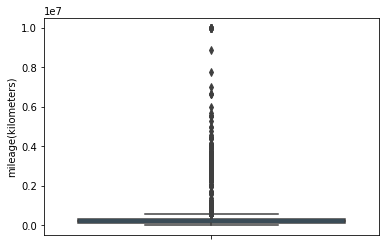

In [34]:
sns.boxplot(y=car_df['mileage(kilometers)'])

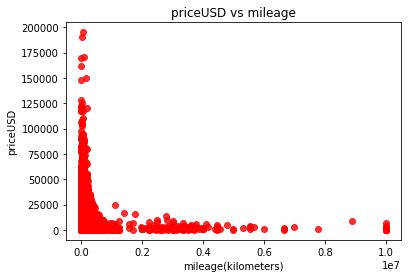

In [35]:
sns.regplot(x = 'mileage(kilometers)',y = 'priceUSD',scatter = True, fit_reg = False, data = car_df,color='red')
plt.title("priceUSD vs mileage")
plt.show()

<b> Note: There is very low relation betweeen mileage and priceUSD </b>

#####  variable volume(cm3)

In [36]:
volume_count = car_df['volume(cm3)_imputed'].value_counts().sort_index()
volume_count.tail(15)

6800.000      1
7000.000      1
7500.000      2
8000.000      2
9983.000      1
10000.000     1
12000.000     1
13000.000     3
14000.000     3
15000.000     2
16000.000     6
16902.000     1
18000.000     9
19000.000     9
20000.000    21
Name: volume(cm3)_imputed, dtype: int64

In [37]:
final_df['volume(cm3)_imputed'].describe()

count   39951.000
mean     2103.197
std       938.648
min       500.000
25%      1600.000
50%      1995.000
75%      2300.000
max     20000.000
Name: volume(cm3)_imputed, dtype: float64

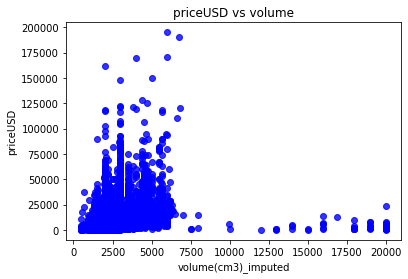

In [38]:
sns.regplot(x = 'volume(cm3)_imputed',y = 'priceUSD',scatter = True, fit_reg = False, data = final_df,color='blue')
plt.title("priceUSD vs volume")
plt.show()

Note: Here is some outliers present in volume. but generally we can say that increase in volume of car, increase in price of car.

In [39]:
sum(final_df['volume(cm3)_imputed']>8000)

57

NOTE: We will remove outliers from volume. So, WORKING RANGE for volume will be 500 to 8000

#### Drop those records which are out of working range

In [40]:
car = final_df[ final_df['volume(cm3)_imputed'] <= 8000 ]

# Also remove mileage variable (not important)
car.drop(columns=['mileage(kilometers)'],inplace=True)

/home/prem/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [41]:
car.shape

(39894, 9)

NOTE: <b>~57 records dropped </b> after removing outliers.

### Categorical Variable

In [42]:
car.head()

priceUSD     condition fuel_type     color transmission  \
0       565  with mileage    petrol     black    mechanics   
1      5550  with mileage    diesel    silver    mechanics   
2      8300  with mileage    petrol    purple         auto   
3      3300  with mileage    petrol      blue    mechanics   
4      2450   with damage    diesel  burgundy    mechanics   

   volume(cm3)_imputed segment_imputed drive_unit_imputed  car_age  
0             2000.000               D  front-wheel drive       27  
1             1400.000               M  front-wheel drive       12  
2             2500.000               D  front-wheel drive       12  
3             1200.000               A  front-wheel drive       15  
4             2200.000               D  front-wheel drive       18

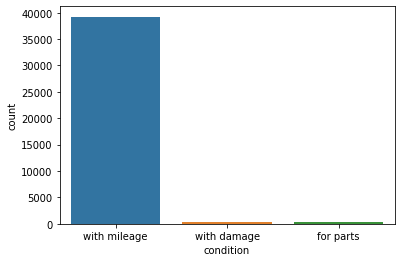

In [43]:
# variable condition
sns.countplot(x = 'condition',data = car)
plt.show()

In [44]:
car['condition'].value_counts()

with mileage    39232
with damage       341
for parts         321
Name: condition, dtype: int64

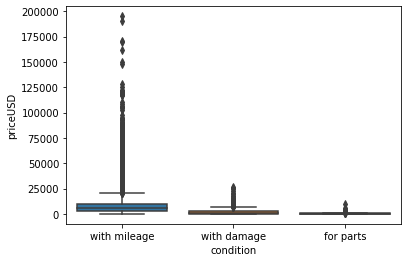

In [45]:
sns.boxplot(x = 'condition', y = 'priceUSD',data = car)
plt.show()

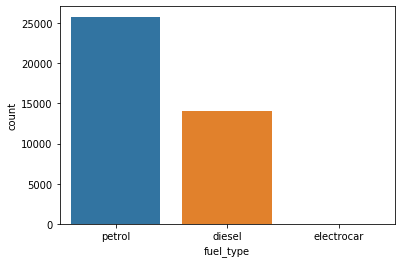

In [46]:
# variable fuel type
sns.countplot(x = 'fuel_type',data = car)
plt.show()

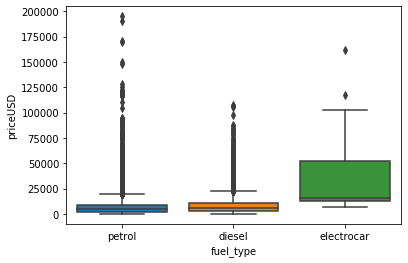

In [47]:
sns.boxplot(x = 'fuel_type', y = 'priceUSD',data = car)
plt.show()

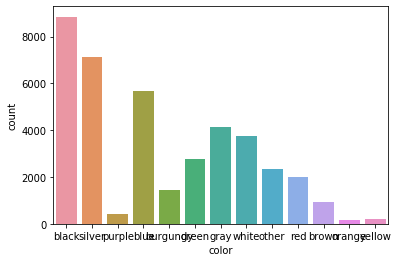

In [48]:
# variable color
sns.countplot(x = 'color',data = car)
plt.show()

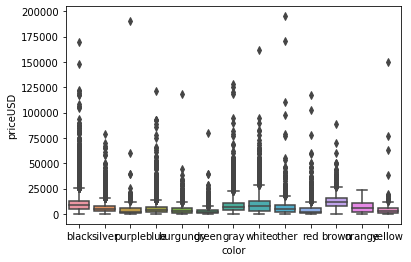

In [49]:
sns.boxplot(x = 'color', y = 'priceUSD',data = car)
plt.show()

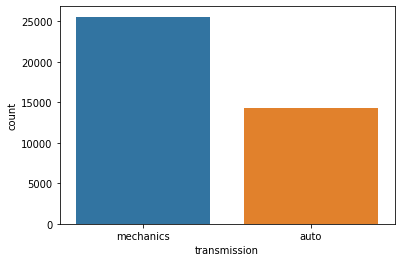

In [50]:
# variable transmission
sns.countplot(x = 'transmission',data = car)
plt.show()

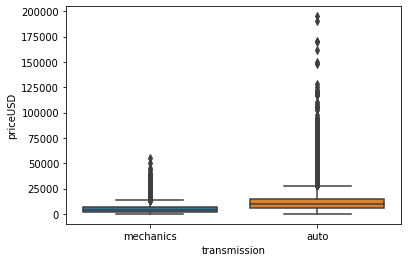

In [51]:
sns.boxplot(x = 'transmission', y = 'priceUSD',data = car)
plt.show()

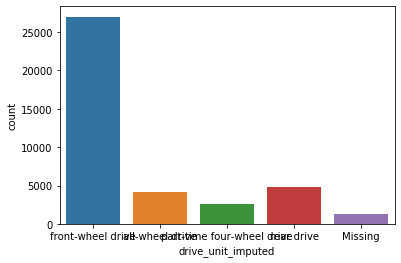

In [52]:
# drive unit
sns.countplot(x = 'drive_unit_imputed',data = car)
plt.show()

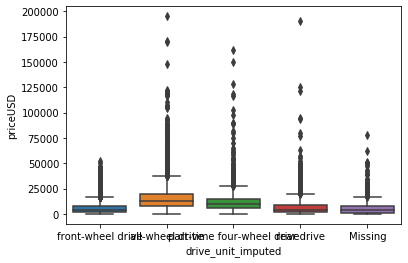

In [53]:
sns.boxplot(x = 'drive_unit_imputed', y = 'priceUSD',data = car)
plt.show()

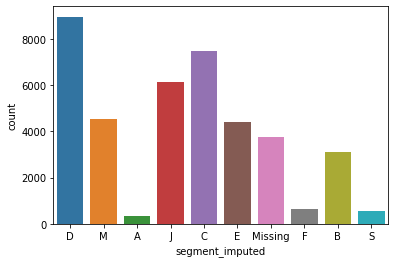

In [54]:
# drive segment
sns.countplot(x = 'segment_imputed',data = car)
plt.show()

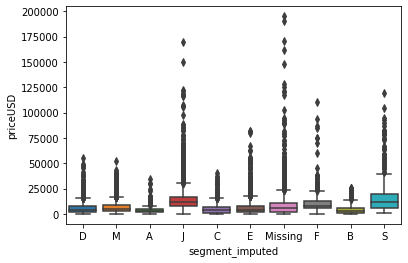

In [55]:
sns.boxplot(x = 'segment_imputed', y = 'priceUSD',data = car)
plt.show()

### Correlations

In [56]:
car_numerical = car.select_dtypes(exclude = object)
car_numerical.head()

priceUSD  volume(cm3)_imputed  car_age
0       565             2000.000       27
1      5550             1400.000       12
2      8300             2500.000       12
3      3300             1200.000       15
4      2450             2200.000       18

In [57]:
car_numerical.corr()

priceUSD  volume(cm3)_imputed  car_age
priceUSD                1.000                0.367   -0.608
volume(cm3)_imputed     0.367                1.000   -0.053
car_age                -0.608               -0.053    1.000

In [58]:
car_numerical.corr().loc[:,'priceUSD'].abs().sort_values(ascending = False)[1:]

car_age               0.608
volume(cm3)_imputed   0.367
Name: priceUSD, dtype: float64

In [59]:
car.head()

priceUSD     condition fuel_type     color transmission  \
0       565  with mileage    petrol     black    mechanics   
1      5550  with mileage    diesel    silver    mechanics   
2      8300  with mileage    petrol    purple         auto   
3      3300  with mileage    petrol      blue    mechanics   
4      2450   with damage    diesel  burgundy    mechanics   

   volume(cm3)_imputed segment_imputed drive_unit_imputed  car_age  
0             2000.000               D  front-wheel drive       27  
1             1400.000               M  front-wheel drive       12  
2             2500.000               D  front-wheel drive       12  
3             1200.000               A  front-wheel drive       15  
4             2200.000               D  front-wheel drive       18

## Modelling

In [60]:
# Shape of the data
car.shape

(39894, 9)

In [61]:
# converting categorical values in dummy variables
car_dummy = pd.get_dummies(car,drop_first = True)
car_dummy.shape

(39894, 33)

In [62]:
car_dummy.head()

priceUSD  volume(cm3)_imputed  car_age  condition_with damage  \
0       565             2000.000       27                      0   
1      5550             1400.000       12                      0   
2      8300             2500.000       12                      0   
3      3300             1200.000       15                      0   
4      2450             2200.000       18                      1   

   condition_with mileage  fuel_type_electrocar  fuel_type_petrol  color_blue  \
0                       1                     0                 1           0   
1                       1                     0                 0           0   
2                       1                     0                 1           0   
3                       1                     0                 1           1   
4                       0                     0                 0           0   

   color_brown  color_burgundy  ...  segment_imputed_E  segment_imputed_F  \
0            0               0  ...                  0                  0   
1            0               0  ...                  0                  0   
2            0               0  ...                  0                  0   
3            0               0  ...                  0                  0   
4            0               1  ...                  0                  0   

   segment_imputed_J  segment_imputed_M  segment_imputed_Missing  \
0                  0                  0                        0   
1                  0                  1                        0   
2                  0                  0                        0   
3                  0                  0                        0   
4                  0                  0                        0   

   segment_imputed_S  drive_unit_imputed_all-wheel drive  \
0                  0                                   0   
1                  0                                   0   
2                  0                                   0   
3                  0                                   0   
4                  0                                   0   

   drive_unit_imputed_front-wheel drive  \
0                                     1   
1                                     1   
2                                     1   
3                                     1   
4                                     1   

   drive_unit_imputed_part-time four-wheel drive  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   drive_unit_imputed_rear drive  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 33 columns]

In [63]:
# Importing some necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [64]:
# separating input and output features
x1 = car_dummy.drop(['priceUSD'],axis = 'columns',inplace = False)
y1 = car_dummy['priceUSD']

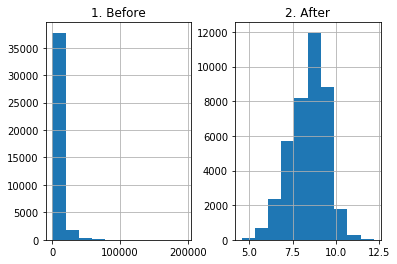

In [65]:
# plotting the variable price
prices = pd.DataFrame({"1. Before": y1, "2. After": np.log(y1)})
prices.hist()
plt.show()

In [66]:
# Transforming price varible into log variale
y1 = np.log(y1)

In [67]:
# Split Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.2,random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31915, 32) (7979, 32) (31915,) (7979,)


### Baseline Model

we are making a base model by using test data mean value.
This is set a benchmark and to compare it with our regression model.

In [68]:
# finding the mean for test data value
base_pred = np.mean(y_test)

In [69]:
# repeating same value till the test length
base_pred = np.repeat(base_pred,len(y_test))

In [70]:
# finding RMSE
base_root_mean_squared_error = np.sqrt(mean_squared_error(y_test,base_pred))
print("Root Mean Squared Error for Base Model is: ",base_root_mean_squared_error)

Root Mean Squared Error for Base Model is:  1.0407918683735802


### Linear Regression

In [71]:
# setting intercept as true
lgr = LinearRegression(fit_intercept = True)

In [72]:
# fit the model
model_lin1 = lgr.fit(X_train,y_train)

In [73]:
# predicting model on test data
car_predictions_lin1 = model_lin1.predict(X_test)

In [74]:
# R Squared Value
r2_lin_train1 = model_lin1.score(X_train,y_train)
r2_lin_test1 = model_lin1.score(X_test,y_test)
print('R2 for Train Data',r2_lin_train1)
print('R2 for Test Data', r2_lin_test1)

R2 for Train Data 0.8143723914312724
R2 for Test Data 0.804931313684284


In [75]:
print('MAE:', mean_absolute_error(y_test, car_predictions_lin1))
print('MSE:', mean_squared_error(y_test, car_predictions_lin1))
print('RMSE:', np.sqrt(mean_squared_error(y_test, car_predictions_lin1)))
print('R2 Score:', r2_score(y_test, car_predictions_lin1))

MAE: 0.3119023459954037
MSE: 0.21130770838258328
RMSE: 0.45968218192853993
R2 Score: 0.804931313684284


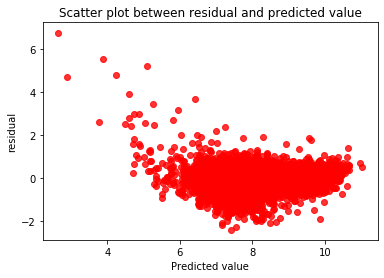

In [76]:
# Residuals plot
residuals  = y_test - car_predictions_lin1
sns.regplot(x = car_predictions_lin1, y = residuals,scatter = True, fit_reg= False,color='red')
plt.xlabel('Predicted value')
plt.ylabel('residual')
plt.title('Scatter plot between residual and predicted value')
plt.show()

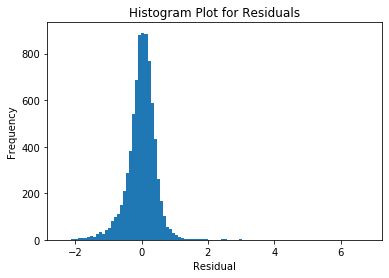

In [77]:
plt.hist(residuals,bins=100)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram Plot for Residuals')
plt.show()

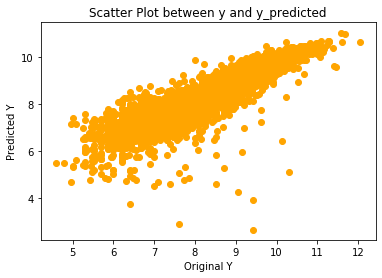

In [78]:
plt.scatter(y_test,car_predictions_lin1,c='orange')
plt.xlabel('Original Y')
plt.ylabel('Predicted Y')
plt.title('Scatter Plot between y and y_predicted')
plt.show()

### Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

In [95]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 600, stop = 800, num = 6)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 30, num = 4)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [96]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [600, 640, 680, 720, 760, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 20, 25, 30], 'min_samples_split': [10, 15, 20], 'min_samples_leaf': [1, 2]}


In [97]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [98]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=720, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=720, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=  14.2s
[CV] n_estimators=720, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s remaining:    0.0s


[CV]  n_estimators=720, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=  15.8s
[CV] n_estimators=720, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=720, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=  18.6s
[CV] n_estimators=720, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=720, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=  14.0s
[CV] n_estimators=720, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=720, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=  14.1s
[CV] n_estimators=640, min_samples_split=20, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=640, min_samples_split=20, min_samples_leaf=1, max_features=auto, max_depth=25, total=  51.6s
[CV] n_estimators=640, min_samples_split=20

[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total= 1.2min
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total= 1.2min
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total= 1.2min
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total= 1.2min
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, total= 1.2min
[CV] n_estimators=720, min_samples_split=20

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 28.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [10, 15, 20],
                                        'n_estimators': [600, 640, 680, 720,
                                                         760, 800]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [99]:
rf_random.best_params_

{'n_estimators': 720,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [100]:
rf_random.best_score_

-0.13066992986476755

In [101]:
y_pred = rf_random.predict(X_test)

In [102]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 0.25095548647865623
MSE: 0.13466006828095634
RMSE: 0.36696058137210913
R2 Score: 0.8756885736927718


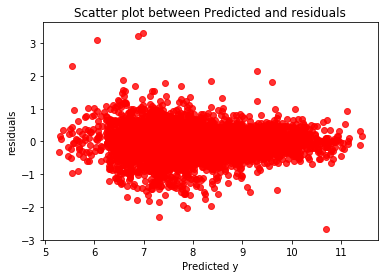

In [103]:
# Residuals plot
residuals  = y_test - y_pred
sns.regplot(x = y_pred, y = residuals,scatter = True, fit_reg= False,color='red')
plt.xlabel('Predicted y')
plt.ylabel('residuals')
plt.title('Scatter plot between Predicted and residuals')
plt.show()

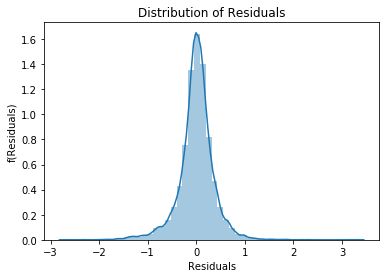

In [104]:
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('f(Residuals)')
plt.title('Distribution of Residuals')
plt.show()

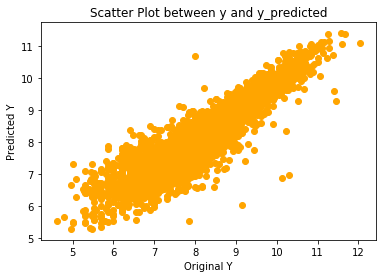

In [105]:
plt.scatter(y_test,y_pred,c='orange')
plt.xlabel('Original Y')
plt.ylabel('Predicted Y')
plt.title('Scatter Plot between y and y_predicted')
plt.show()